## Given issue or problem statement for Lead scoring Case study
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>

In [1]:
#removing unwanted warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1 : Loading and Cleaning the Data

In [3]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')

# checking the head values
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# The info() methods gives all the data columns and the idea of null values of the objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# checking the shape of the DF
df.shape

(9240, 37)

In [6]:
# checking the mean median mode of the numerical data of DF , to get an idea about the ouliers
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN 
df = df.replace('select',np.nan)

In [9]:
# Checking for not unique values
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique values =1 as that wont contribute much to our analysis
df1= df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [11]:
# dropping the all unique values as well
df1 = df1.drop('Prospect ID',1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [12]:
# Checking for missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [24]:
# removing the null rows
df3 = df2[df2.isnull().sum(axis=1) <1]

In [25]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

43.5

In [26]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### 2. EDA

### 2.1. Univariate Analysis for categorical variables

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 2 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4019 non-null   object 
 1   Lead Source                                    4019 non-null   object 
 2   Do Not Email                                   4019 non-null   object 
 3   Do Not Call                                    4019 non-null   object 
 4   Converted                                      4019 non-null   int64  
 5   TotalVisits                                    4019 non-null   float64
 6   Total Time Spent on Website                    4019 non-null   int64  
 7   Page Views Per Visit                           4019 non-null   float64
 8   Last Activity                                  4019 non-null   object 
 9   Country                                        4019 

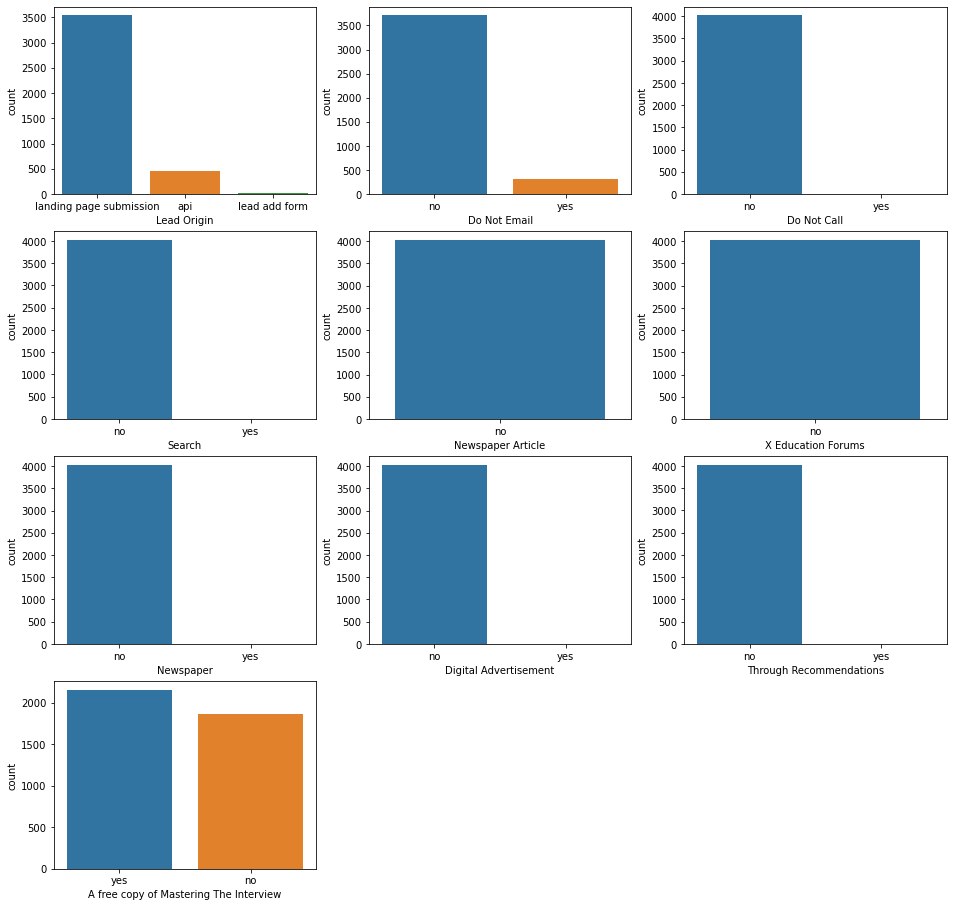

In [46]:
categorical =['Lead Origin','Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums'
              ,'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
plt.figure(figsize=(16,20))
p=1
for i in categorical: 
    plt.subplot(5,3,p)
    sns.countplot(df3[i])
    p=p+1
plt.show()

#### the News paper article, Digital Advertisement, Through Recommendations,Newspaper,search, Xeducation forums, Dont call  all have only NO as reply
#### equal no of people took  and rejucted the free copy of mastering the interview

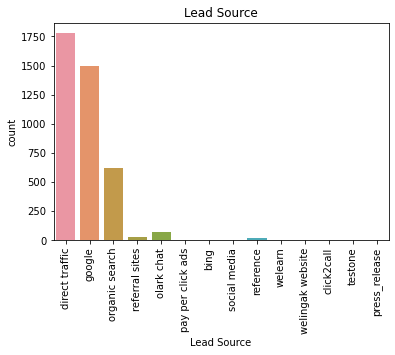

In [31]:
# as the Lead Source is the important variable concentrating more on it
sns.countplot(df3['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### lead  source is mostly rely on the direct traffice , google and organic searches

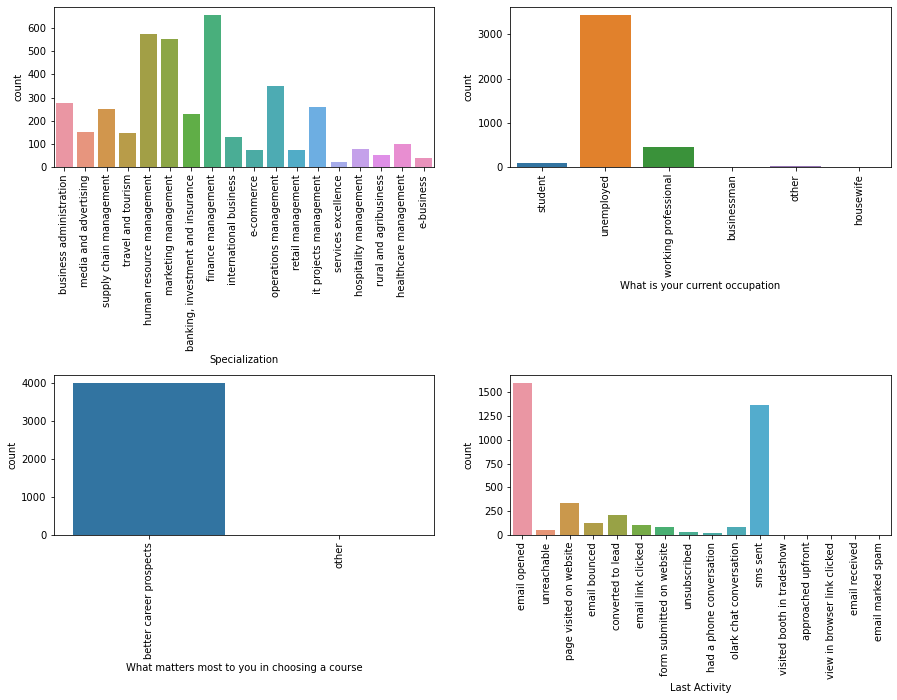

In [64]:
# making them seperate for the sake of redability
plt.figure(figsize = (15,30))
categorical2=['Specialization','What is your current occupation','What matters most to you in choosing a course','Last Activity','Country','Last Notable Activity']
p=1
for i in x: 
    plt.subplot(5,2,p)
    plt.subplots_adjust(hspace=1.3)
    sns.countplot(df3[i]).tick_params(axis='x', rotation = 90)
    p=p+1
plt.show()

In [266]:
df3['What is your current occupation'].value_counts()

unemployed              3440
working professional     454
student                  101
other                     13
housewife                  7
businessman                4
Name: What is your current occupation, dtype: int64

#### large set of poeple on search for this are UMEMPLYED
#### Specializations involve various domains mainly beging the Finance, HR,Marketing, operations and IT management
#### Most people intention on this search is mainly better carrear option
#### Last activity is through the email,SMS , pages visited on the website


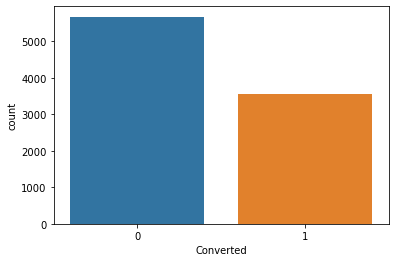

In [33]:
sns.countplot(df['Converted'])
plt.show()

In [257]:
#### fair share of people are getting converted

### 2.2 Numerical Variables

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 2 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4019 non-null   object 
 1   Lead Source                                    4019 non-null   object 
 2   Do Not Email                                   4019 non-null   object 
 3   Do Not Call                                    4019 non-null   object 
 4   Converted                                      4019 non-null   int64  
 5   TotalVisits                                    4019 non-null   float64
 6   Total Time Spent on Website                    4019 non-null   int64  
 7   Page Views Per Visit                           4019 non-null   float64
 8   Last Activity                                  4019 non-null   object 
 9   Country                                        4019 

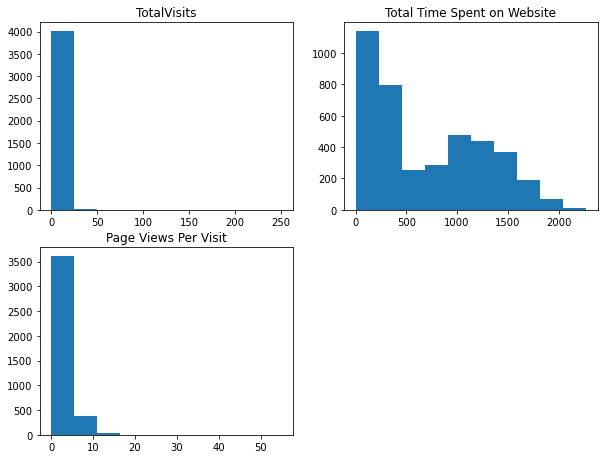

In [261]:
plt.figure(figsize = (10,20))
numeric =['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=1
for i in numeric: 
    plt.subplot(5,2,p)
    plt.hist(df3[i])
    plt.title(i)
    p=p+1
plt.show()

#### total time spend gave more info about the conversion rate and the total time  the person visited the website as well

### 2.3 Now we need to compare the categorical to the converted ratio to get the insights

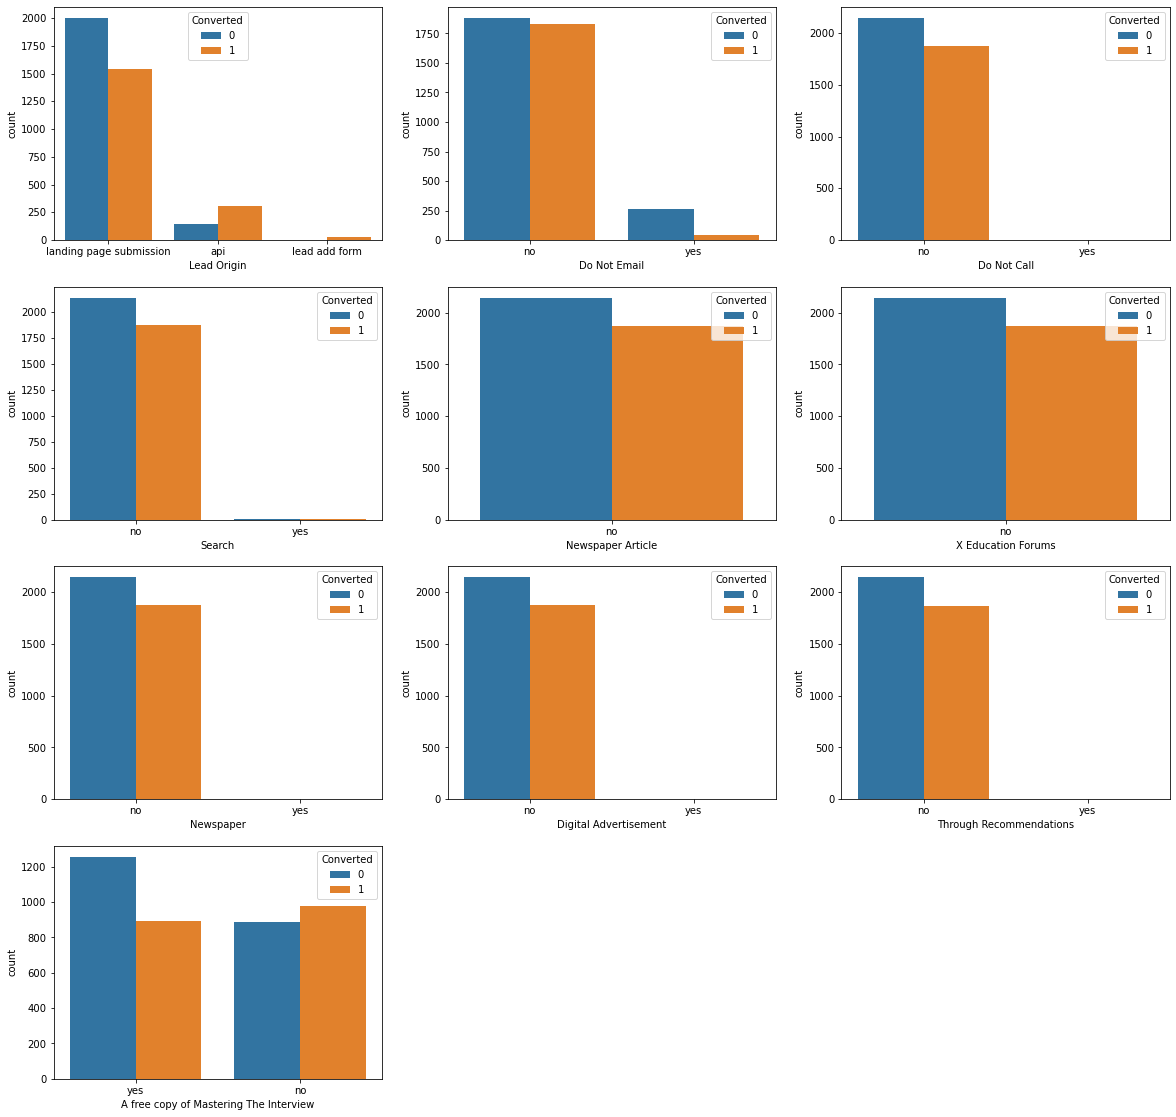

In [48]:
plt.figure(figsize = (20,30))
p=1
for i in categorical: 
    plt.subplot(6,3,p)
    sns.countplot(x=i, hue='Converted', data= df3)
    p=p+1
plt.show()

#### API has more convertion rate following the landing page submission
#### ones opted for Call and Email has equal conversiontion and rejection rate
#### More people converted rejected the Free copy of mastering the interviews as a point to focuss

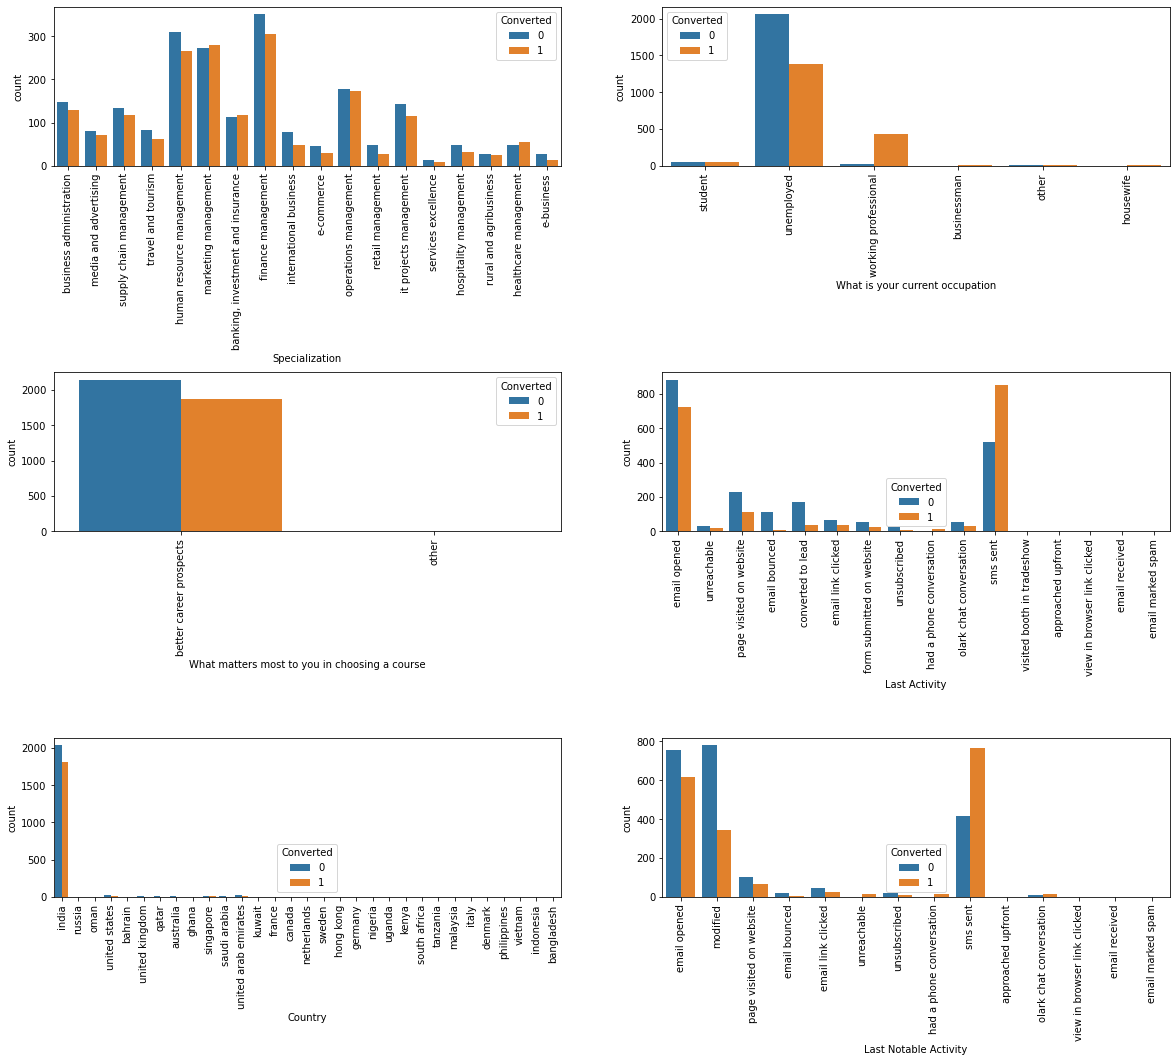

In [67]:
plt.figure(figsize = (20,50))
p=1
for i in categorical2: 
    plt.subplot(8,2,p)
    plt.subplots_adjust(hspace=1.3)
    sns.countplot(x=i, hue='Converted', data= df3).tick_params(axis='x', rotation = 90)
    p=p+1
    print()
plt.show()

#### The most Conversion rate and rejection rate depends soley on INDIA , so, should be focusing more over that region
#### High conversion are thru the SMS and then the Emails 
#### conversion rate is more than rejection in marketing and banking and health care sectors

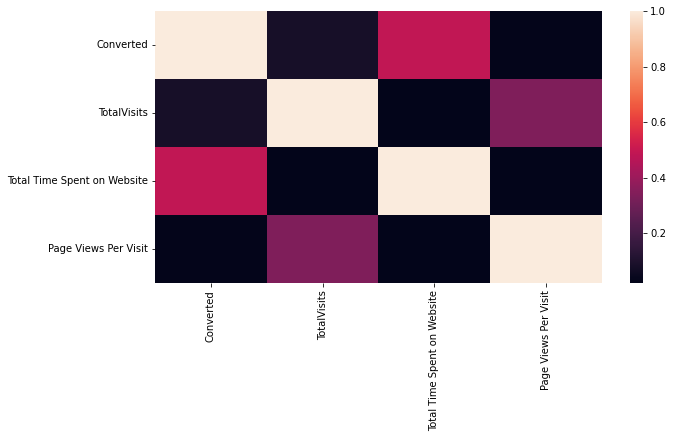

In [68]:
# using heat map for Correlation check
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr())
plt.show()

#### Total time spent on the website is an important parameter as it is verymuch correlated with the Conversion rate

In [71]:
## checking for the outliers
df3[numeric].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4019.000000,4019.000000,4019.000000
mean,4.767853,696.068176,3.278689
std,5.290666,555.875303,2.005035
min,0.000000,0.000000,0.000000
25%,2.000000,199.000000,2.000000
50%,4.000000,504.000000,3.000000
75%,6.000000,1174.000000,4.000000
90%,9.000000,1495.000000,5.500000
99%,20.000000,1884.460000,10.000000
max,251.000000,2272.000000,55.000000


#### Not many outliers 

## 3. Dummy Variables

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 2 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4019 non-null   object 
 1   Lead Source                                    4019 non-null   object 
 2   Do Not Email                                   4019 non-null   object 
 3   Do Not Call                                    4019 non-null   object 
 4   Converted                                      4019 non-null   int64  
 5   TotalVisits                                    4019 non-null   float64
 6   Total Time Spent on Website                    4019 non-null   int64  
 7   Page Views Per Visit                           4019 non-null   float64
 8   Last Activity                                  4019 non-null   object 
 9   Country                                        4019 

#### Getting the dummies for the object types 

In [76]:
df3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
6,landing page submission,google,no,no,1,2.0,1640,2.00,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
10,landing page submission,organic search,no,no,1,8.0,1351,8.00,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,email opened
11,landing page submission,direct traffic,no,no,1,8.0,1343,2.67,page visited on website,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,page visited on website


In [78]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df3[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'Specialization' ,'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final= pd.concat([df3, dummy], axis=1)
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,1,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,0,1,0,0,0,0,0,0
6,landing page submission,google,no,no,1,2.0,1640,2.00,email opened,india,...,0,0,0,1,0,0,0,0,0,0
10,landing page submission,organic search,no,no,1,8.0,1351,8.00,email opened,india,...,1,0,0,0,0,0,0,0,0,0
11,landing page submission,direct traffic,no,no,1,8.0,1343,2.67,page visited on website,india,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df_final= df_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_click2call,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## 4. Test and Train Split

In [143]:
# Importing sklearn for test and train split
from sklearn.model_selection import train_test_split

In [144]:
X = df_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_click2call,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.00,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [145]:
# Putting the target variable in y
y = df_final['Converted']
y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [146]:
# Split the dataset into 70: 30 ratio, 70 train and 30 to test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [147]:
# Importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [148]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_click2call,Lead Source_direct traffic,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2866,0.093023,0.185739,0.1250,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4541,0.093023,0.409331,0.2500,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4597,0.046512,0.189261,0.1250,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8016,0.162791,0.042254,0.4375,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4793,0.093023,0.523327,0.2500,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### doing RFE as there are many columns with us

## 5. Model Building 

In [149]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [150]:
# Import RFE
from sklearn.feature_selection import RFE

In [151]:
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [152]:
# Features selected by rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Source_click2call', False, 55),
 ('Lead Source_direct traffic', False, 14),
 ('Lead Source_google', False, 41),
 ('Lead Source_olark chat', False, 12),
 ('Lead Source_organic search', False, 33),
 ('Lead Source_pay per click ads', False, 54),
 ('Lead Source_press_release', False, 50),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 3),
 ('Lead Source_social media', False, 24),
 ('Lead Source_testone', False, 27),
 ('Lead Source_welearn', False, 25),
 ('Lead Source_welingak website', False, 20),
 ('Do Not Email_yes', True, 1),
 ('Last Activity_converted to lead', False, 17),
 ('Last Activity_email bounced', False, 10),
 ('Last Activity_email link clicked', False, 31),
 ('Last Activity_email marked spam', False, 19),
 ('Last Activity_email opened', False, 

In [153]:
# selected columns by RFE
selected = X_train.columns[rfe.support_]

In [154]:
# Selecting columns selected by RFE
X_train = X_train[selected]

In [155]:
# Importing statsmodels
import statsmodels.api as sm

In [156]:
# getting the summary to check the p value and Z
X_train_sm = sm.add_constant(X_train)
lm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2797
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1287.0
Date:                Mon, 27 May 2024   Deviance:                       2574.1
Time:                        01:58:05   Pearson chi2:                 2.78e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0866      0.318     -3.420      0.001      -1.709      -0.464
TotalVisits                                              2.9607      0.613      4.831      0.000       1.759       4.162
Total Time Spent on Website                              4.7656      0.219     21.755      0.000       4.336       5.195
Lead Origin_landing page submission                     -0.7466      0.158     -4.729      0.000      -1.056      -0.437
Lead Origin_lead add form                               23.2793   3.84e+04      0.001      1.000   -7.52e+04    7.52e+04
Lead Source_reference                                    0.1946   4.18e+04   4.66e-06      1.000   -8.19e+04    8.19e+04
Do Not Email_yes                                        -1.9415      0.270     -7.203      0.000      -2.470      -1.413
Last Activity_had a phone conversation                   0.6029      1.425      0.423      0.672      -2.190       3.396
Last Activity_sms sent                                   1.1183      0.104     10.781      0.000       0.915       1.322
Specialization_hospitality management                   -1.0484      0.403     -2.603      0.009      -1.838      -0.259
What is your current occupation_housewife               23.8546   3.46e+04      0.001      0.999   -6.79e+04    6.79e+04
What is your current occupation_unemployed              -0.7171      0.276     -2.597      0.009      -1.258      -0.176
What is your current occupation_working professional     2.1061      0.370      5.696      0.000       1.381       2.831
Last Notable Activity_had a phone conversation          23.1524   2.01e+04      0.001      0.999   -3.93e+04    3.94e+04
Last Notable Activity_unreachable                        2.5524      1.149      2.221      0.026       0.300       4.805
Last Notable Activity_unsubscribed                       1.6441      0.729      2.255      0.024       0.215       3.073
========================================================================================================================
"""

In [157]:
# Importing libararies for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,8.93
2,Lead Origin_landing page submission,7.38
3,Lead Origin_lead add form,4.81
4,Lead Source_reference,4.76
6,Last Activity_had a phone conversation,3.02
12,Last Notable Activity_had a phone conversation,3.02
0,TotalVisits,2.74
1,Total Time Spent on Website,2.62
11,What is your current occupation_working profes...,1.99
7,Last Activity_sms sent,1.59


#### The VIF of the 'What is your current occupation_unemployed' is far more than 5 removing it

In [159]:
X_train.drop('What is your current occupation_unemployed', axis = 1, inplace = True)

In [160]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2798
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1290.4
Date:                Mon, 27 May 2024   Deviance:                       2580.8
Time:                        01:58:06   Pearson chi2:                 2.78e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7685      0.181     -9.785      0.000      -2.123      -1.414
TotalVisits                                              2.9263      0.612      4.780      0.000       1.726       4.126
Total Time Spent on Website                              4.7691      0.219     21.782      0.000       4.340       5.198
Lead Origin_landing page submission                     -0.7495      0.157     -4.760      0.000      -1.058      -0.441
Lead Origin_lead add form                               23.2455   3.84e+04      0.001      1.000   -7.52e+04    7.52e+04
Lead Source_reference                                    0.2100   4.18e+04   5.02e-06      1.000    -8.2e+04     8.2e+04
Do Not Email_yes                                        -1.9463      0.269     -7.239      0.000      -2.473      -1.419
Last Activity_had a phone conversation                   0.5766      1.423      0.405      0.685      -2.212       3.365
Last Activity_sms sent                                   1.1037      0.103     10.690      0.000       0.901       1.306
Specialization_hospitality management                   -1.0527      0.405     -2.600      0.009      -1.846      -0.259
What is your current occupation_housewife               24.5404   3.46e+04      0.001      0.999   -6.79e+04    6.79e+04
What is your current occupation_working professional     2.7975      0.257     10.872      0.000       2.293       3.302
Last Notable Activity_had a phone conversation          23.1505   2.01e+04      0.001      0.999   -3.93e+04    3.94e+04
Last Notable Activity_unreachable                        2.5247      1.149      2.197      0.028       0.273       4.777
Last Notable Activity_unsubscribed                       1.6188      0.729      2.221      0.026       0.190       3.047
========================================================================================================================
"""

In [161]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_lead add form,4.77
4,Lead Source_reference,4.76
2,Lead Origin_landing page submission,3.23
6,Last Activity_had a phone conversation,3.02
11,Last Notable Activity_had a phone conversation,3.02
0,TotalVisits,2.49
1,Total Time Spent on Website,2.37
7,Last Activity_sms sent,1.56
5,Do Not Email_yes,1.18
10,What is your current occupation_working profes...,1.17


#### Lead Origin_lead add form has the most p value , so dropping it off

In [163]:
X_train.drop('Lead Origin_lead add form', axis = 1, inplace = True)

In [164]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2799
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.6
Date:                Mon, 27 May 2024   Deviance:                       2585.1
Time:                        01:58:10   Pearson chi2:                 2.78e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7313      0.179     -9.656      0.000      -2.083      -1.380
TotalVisits                                              2.9100      0.611      4.762      0.000       1.712       4.108
Total Time Spent on Website                              4.7726      0.219     21.794      0.000       4.343       5.202
Lead Origin_landing page submission                     -0.7840      0.156     -5.011      0.000      -1.091      -0.477
Lead Source_reference                                   23.4189   1.67e+04      0.001      0.999   -3.26e+04    3.27e+04
Do Not Email_yes                                        -1.9501      0.269     -7.248      0.000      -2.477      -1.423
Last Activity_had a phone conversation                   0.5749      1.423      0.404      0.686      -2.214       3.363
Last Activity_sms sent                                   1.0996      0.103     10.651      0.000       0.897       1.302
Specialization_hospitality management                   -1.0598      0.405     -2.617      0.009      -1.853      -0.266
What is your current occupation_housewife               24.5381   3.46e+04      0.001      0.999   -6.78e+04    6.79e+04
What is your current occupation_working professional     2.7928      0.257     10.853      0.000       2.288       3.297
Last Notable Activity_had a phone conversation          23.1421      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Last Notable Activity_unreachable                        2.5184      1.150      2.190      0.028       0.265       4.772
Last Notable Activity_unsubscribed                       1.6157      0.728      2.218      0.027       0.188       3.043
========================================================================================================================
"""

In [165]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.22
5,Last Activity_had a phone conversation,3.02
10,Last Notable Activity_had a phone conversation,3.02
0,TotalVisits,2.49
1,Total Time Spent on Website,2.37
6,Last Activity_sms sent,1.56
4,Do Not Email_yes,1.18
9,What is your current occupation_working profes...,1.17
12,Last Notable Activity_unsubscribed,1.08
3,Lead Source_reference,1.02


#### The VIF are good, p values for 'Lead Source_reference' ,'What is your current occupation_housewife','Last Notable Activity_had a phone conversation' are high amng this 'Last Notable Activity_had a phone conversation' has more VIF comparitively so droping it

In [166]:
X_train.drop('Lead Source_reference', axis = 1, inplace = True)

In [169]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2800
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1300.3
Date:                Mon, 27 May 2024   Deviance:                       2600.6
Time:                        01:58:40   Pearson chi2:                 2.80e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6174      0.176     -9.184      0.000      -1.963      -1.272
TotalVisits                                              2.8330      0.603      4.696      0.000       1.650       4.016
Total Time Spent on Website                              4.7456      0.218     21.769      0.000       4.318       5.173
Lead Origin_landing page submission                     -0.8766      0.155     -5.674      0.000      -1.179      -0.574
Do Not Email_yes                                        -1.9573      0.269     -7.272      0.000      -2.485      -1.430
Last Activity_had a phone conversation                   0.5688      1.421      0.400      0.689      -2.217       3.354
Last Activity_sms sent                                   1.0884      0.103     10.558      0.000       0.886       1.291
Specialization_hospitality management                   -1.0759      0.405     -2.658      0.008      -1.869      -0.282
What is your current occupation_housewife               24.5262   3.46e+04      0.001      0.999   -6.79e+04    6.79e+04
What is your current occupation_working professional     2.7960      0.257     10.898      0.000       2.293       3.299
Last Notable Activity_had a phone conversation          23.1170   1.99e+04      0.001      0.999   -3.91e+04    3.91e+04
Last Notable Activity_unreachable                        2.4975      1.151      2.169      0.030       0.241       4.754
Last Notable Activity_unsubscribed                       1.6049      0.726      2.210      0.027       0.182       3.028
========================================================================================================================
"""

In [142]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.22
5,Last Activity_had a phone conversation,3.02
10,Last Notable Activity_had a phone conversation,3.02
0,TotalVisits,2.49
1,Total Time Spent on Website,2.37
6,Last Activity_sms sent,1.56
4,Do Not Email_yes,1.18
9,What is your current occupation_working profes...,1.17
12,Last Notable Activity_unsubscribed,1.08
3,Lead Source_reference,1.02


In [170]:
### Droping 'Last Notable Activity_had a phone conversation' as it is having high p value

In [171]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [172]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2801
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1302.4
Date:                Mon, 27 May 2024   Deviance:                       2604.8
Time:                        02:00:58   Pearson chi2:                 2.80e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6154      0.176     -9.181      0.000      -1.960      -1.271
TotalVisits                                              2.8651      0.602      4.761      0.000       1.686       4.045
Total Time Spent on Website                              4.7419      0.218     21.760      0.000       4.315       5.169
Lead Origin_landing page submission                     -0.8811      0.154     -5.711      0.000      -1.183      -0.579
Do Not Email_yes                                        -1.9697      0.269     -7.325      0.000      -2.497      -1.443
Last Activity_had a phone conversation                   2.7061      0.950      2.847      0.004       0.843       4.569
Last Activity_sms sent                                   1.0891      0.103     10.565      0.000       0.887       1.291
Specialization_hospitality management                   -1.0755      0.405     -2.657      0.008      -1.869      -0.282
What is your current occupation_housewife               22.5270   1.27e+04      0.002      0.999    -2.5e+04     2.5e+04
What is your current occupation_working professional     2.7907      0.257     10.873      0.000       2.288       3.294
Last Notable Activity_unreachable                        2.4966      1.151      2.169      0.030       0.240       4.753
Last Notable Activity_unsubscribed                       1.6172      0.726      2.228      0.026       0.195       3.040
========================================================================================================================
"""

In [173]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.19
0,TotalVisits,2.48
1,Total Time Spent on Website,2.36
5,Last Activity_sms sent,1.56
3,Do Not Email_yes,1.18
8,What is your current occupation_working profes...,1.16
10,Last Notable Activity_unsubscribed,1.08
6,Specialization_hospitality management,1.02
4,Last Activity_had a phone conversation,1.01
9,Last Notable Activity_unreachable,1.01


#### dropping 'What is your current occupation_housewife' as it is with more p value

In [174]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [175]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
lm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2813
Model:                            GLM   Df Residuals:                     2802
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1307.1
Date:                Mon, 27 May 2024   Deviance:                       2614.3
Time:                        02:02:28   Pearson chi2:                 2.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6057      0.176     -9.138      0.000      -1.950      -1.261
TotalVisits                                              2.8222      0.601      4.697      0.000       1.645       4.000
Total Time Spent on Website                              4.7349      0.218     21.768      0.000       4.309       5.161
Lead Origin_landing page submission                     -0.8730      0.154     -5.665      0.000      -1.175      -0.571
Do Not Email_yes                                        -1.9731      0.269     -7.346      0.000      -2.500      -1.447
Last Activity_had a phone conversation                   2.6971      0.950      2.840      0.005       0.836       4.559
Last Activity_sms sent                                   1.0788      0.103     10.483      0.000       0.877       1.280
Specialization_hospitality management                   -1.0790      0.404     -2.668      0.008      -1.872      -0.286
What is your current occupation_working professional     2.7829      0.257     10.849      0.000       2.280       3.286
Last Notable Activity_unreachable                        2.4867      1.151      2.161      0.031       0.231       4.742
Last Notable Activity_unsubscribed                       1.6107      0.725      2.220      0.026       0.189       3.033
========================================================================================================================
"""

In [176]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.19
0,TotalVisits,2.48
1,Total Time Spent on Website,2.36
5,Last Activity_sms sent,1.56
3,Do Not Email_yes,1.18
7,What is your current occupation_working profes...,1.16
9,Last Notable Activity_unsubscribed,1.08
6,Specialization_hospitality management,1.02
4,Last Activity_had a phone conversation,1.01
8,Last Notable Activity_unreachable,1.01


### All are having VIF<5 and p<0.05 . so we can proceed with the model

## 6. Model Prediction

In [177]:
# Predicting the model for errors
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2866    0.435870
4541    0.430938
4597    0.189800
8016    0.322909
4793    0.984069
5655    0.201106
1676    0.630571
1330    0.174136
2101    0.915242
7887    0.598263
dtype: float64

In [178]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43586973, 0.43093836, 0.18980025, 0.3229085 , 0.98406933,
       0.20110608, 0.6305712 , 0.17413598, 0.91524231, 0.59826289])

In [196]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,converted_prob
0,1,0.435870
1,0,0.430938
2,1,0.189800
3,0,0.322909
4,1,0.984069


In [197]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['pred_to_be_converted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_to_be_converted
0,1,0.435870,0
1,0,0.430938,0
2,1,0.189800,0
3,0,0.322909,0
4,1,0.984069,1


## 7. Model Evaluation

In [186]:
# metrics
from sklearn import metrics

In [187]:
# confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_to_be_converted )
confusion

array([[1256,  253],
       [ 348,  956]], dtype=int64)

In [189]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_to_be_converted)

0.7863490934944899

In [190]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [191]:
# sensitivity
TP/(TP+FN)

0.7331288343558282

In [192]:
#specificity
TN/(TN+FP)

0.832339297548045

#### 79% accuracy is good percentage with sensitivity and specificity being 74% and 83%

### ROC

In [193]:
# ROC function
def ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.converted_prob, drop_intermediate = False )

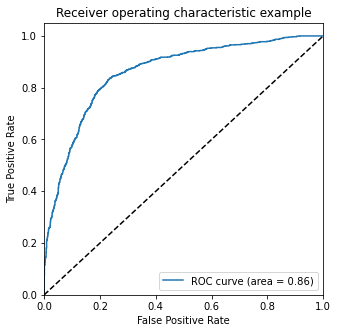

In [201]:
# Call the ROC function
ROC(y_train_pred_final.Converted, y_train_pred_final.converted_prob)

#### The area under ROC curve is 0.86, good one to go with

In [202]:
# Creating columns with different probability cutoffs 
k = [float(x)/10 for x in range(10)]
for i in k:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_to_be_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.435870,0,1,1,1,1,1,0,0,0,0,0
1,0,0.430938,0,1,1,1,1,1,0,0,0,0,0
2,1,0.189800,0,1,1,0,0,0,0,0,0,0,0
3,0,0.322909,0,1,1,1,1,0,0,0,0,0,0
4,1,0.984069,1,1,1,1,1,1,1,1,1,1,1


In [203]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.463562,1.000000,0.000000
0.1,0.1,0.538215,0.990798,0.147117
0.2,0.2,0.704586,0.930215,0.509609
0.3,0.3,0.769285,0.883436,0.670643
0.4,0.4,0.795947,0.817485,0.777336
0.5,0.5,0.786349,0.733129,0.832339
0.6,0.6,0.772485,0.659509,0.870113
0.7,0.7,0.741557,0.544479,0.911862
0.8,0.8,0.699609,0.410276,0.949636
0.9,0.9,0.640242,0.240798,0.985421


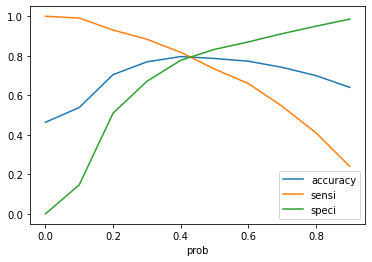

In [204]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### The cutt of here is 0.4

In [206]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_to_be_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.435870,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.430938,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.189800,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.322909,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.984069,1,1,1,1,1,1,1,1,1,1,1,1


In [207]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7877710629221472

In [208]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1106,  403],
       [ 194, 1110]], dtype=int64)

In [209]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [210]:
# sensitivity
TP/(TP+FN)

0.8512269938650306

In [212]:
# specificity
TN/(TN+FP)

0.7329357190192181

#### here we have 78% accuracy, 85% sensitivity and 73% specificity

### 8. Prediction

In [213]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [215]:
# train model coloumns
columns = X_train.columns

In [217]:
# Select the columns in X_train for X_test as well
X_test = X_test[columns]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[columns])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_sms sent,Specialization_hospitality management,What is your current occupation_working professional,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
3589,1.0,0.325581,0.658011,1,0,0,0,0,0,0,0
900,1.0,0.116279,0.514525,1,0,0,0,0,0,0,0
7500,1.0,0.093023,0.051496,1,0,0,1,0,0,0,0
5330,1.0,0.139535,0.694542,1,0,0,0,0,0,0,0
3693,1.0,0.232558,0.405370,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4634,1.0,0.069767,0.660211,1,0,0,0,0,0,0,0
968,1.0,0.069767,0.055018,1,0,0,0,0,0,0,0
2011,1.0,0.069767,0.634243,0,0,0,1,0,0,0,0
1079,1.0,0.093023,0.279049,1,0,0,1,0,1,0,0


In [218]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
# putting both predicted and test data together 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'conv_prob'})
y_pred_final.head()

,Converted,conv_prob
0,1,0.825749
1,1,0.570942
2,1,0.290373
3,1,0.769182
4,1,0.764190


In [219]:
# using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.conv_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,conv_prob,final_predicted
0,1,0.825749,1
1,1,0.570942,1
2,1,0.290373,0
3,1,0.769182,1
4,1,0.764190,1
...,...,...,...
1201,1,0.699358,1
1202,0,0.116984,0
1203,1,0.935417,1
1204,1,0.951052,1


In [220]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7545605306799337

In [221]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[436, 199],
       [ 97, 474]], dtype=int64)

In [222]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [223]:
#sensitivity
TP/(TP+FN)

0.830122591943958

In [224]:
#specificity
TN/(TN+FP)

0.6866141732283465

In [ ]:
# Traning and test data show very similar result 
#         Accuracy sensitivity specificity
# train   78       85          73
# test    75       83          69

## 9. Precision-Recall

In [226]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[1106,  403],
       [ 194, 1110]], dtype=int64)

In [228]:
# Precision is  TP/(TP + FP)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7336417713152676

In [229]:
#Recall is TP/(TP + FN)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8512269938650306

#### Precision around 73% and Recall as 85%

### 9.1. Precision and recall curve

In [230]:
from sklearn.metrics import precision_recall_curve

In [231]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 2808    0
 2809    1
 2810    0
 2811    1
 2812    0
 Name: Converted, Length: 2813, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       1
        ..
 2808    0
 2809    0
 2810    1
 2811    1
 2812    0
 Name: final_predicted, Length: 2813, dtype: int64)

In [235]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.converted_prob)

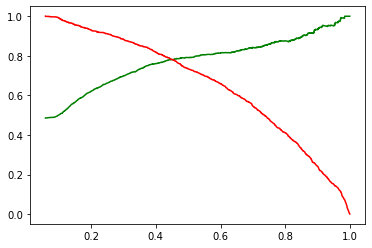

In [236]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

In [237]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,converted_prob,pred_to_be_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.435870,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.430938,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.189800,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.322909,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.984069,1,1,1,1,1,1,1,1,1,1,1,1


In [238]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7948809100604337

In [239]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1183,  326],
       [ 251, 1053]], dtype=int64)

In [241]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [242]:
#Precision is  TP/(TP + FP)
TP / (TP + FP)

0.7635968092820885

In [243]:
#Recall is TP/(TP + FN)
TP / (TP + FN)

0.8075153374233128

#### cut off as 0.41 , Precision as 76% and Recall as 80%

## 10. Prediction on Test set

In [245]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
# putting both the frames together
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'conv_prob'})
y_pred_final.head()

,Converted,conv_prob
0,1,0.825749
1,1,0.570942
2,1,0.290373
3,1,0.769182
4,1,0.764190


In [248]:
# using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.conv_prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,conv_prob,final_predicted
0,1,0.825749,1
1,1,0.570942,1
2,1,0.290373,0
3,1,0.769182,1
4,1,0.764190,1
...,...,...,...
1201,1,0.699358,1
1202,0,0.116984,0
1203,1,0.935417,1
1204,1,0.951052,1


In [249]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7686567164179104

In [250]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[473, 162],
       [117, 454]], dtype=int64)

In [251]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [254]:
#Precision is  TP/(TP + FP)
TP / (TP + FP)

0.737012987012987

In [255]:
#Recall is TP/(TP + FN)
TP / (TP + FN)

0.7950963222416813

#### using cut off as 0.41 , got Precision as 73% and Recall as 79%

### Concluding with important points
#### 1. Total time spent on the website is an important parameter as it is verymuch correlated with the Conversion rate
#### 2. The News paper article, Digital Advertisement, Through Recommendations,Newspaper,search, Xeducation forums, Dont call  all have only NO as reply
#### 3. Equal no of people took  and rejucted the free copy of mastering the interview
#### 4. Lead  source is mostly rely on the direct traffice , google and organic searches
#### 5. API has more convertion rate following the landing page submission
#### 6. Ones opted for Call and Email has equal conversiontion and rejection rate
#### 7. More people converted rejected the Free copy of mastering the interviews as a point to focuss
#### 8. Total time spend gave more info about the conversion rate and the total time  the person visited the website as well
#### 9. The most Conversion rate and rejection rate depends soley on INDIA , so, should be focusing more over that region
#### 10. High conversion are thru the SMS and then the Emails 
#### 11. conversion rate is more than rejection in marketing and banking and health care sectors